***Data Visualization***

In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec



In [2]:
dataset_path = 'Rice Pest Detection/'

classes = [f.name for f in os.scandir(dataset_path) if f.is_dir()]

In [3]:
image_counts = {}
random_images = {}
images = {}

for class_name in classes:
    class_folder = os.path.join(dataset_path, class_name)
    image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg'))]
    images[class_name] = image_files
    image_counts[class_name] = len(image_files)
    
    random_image = random.choice(image_files)
    random_images[class_name] = os.path.join(class_folder, random_image)


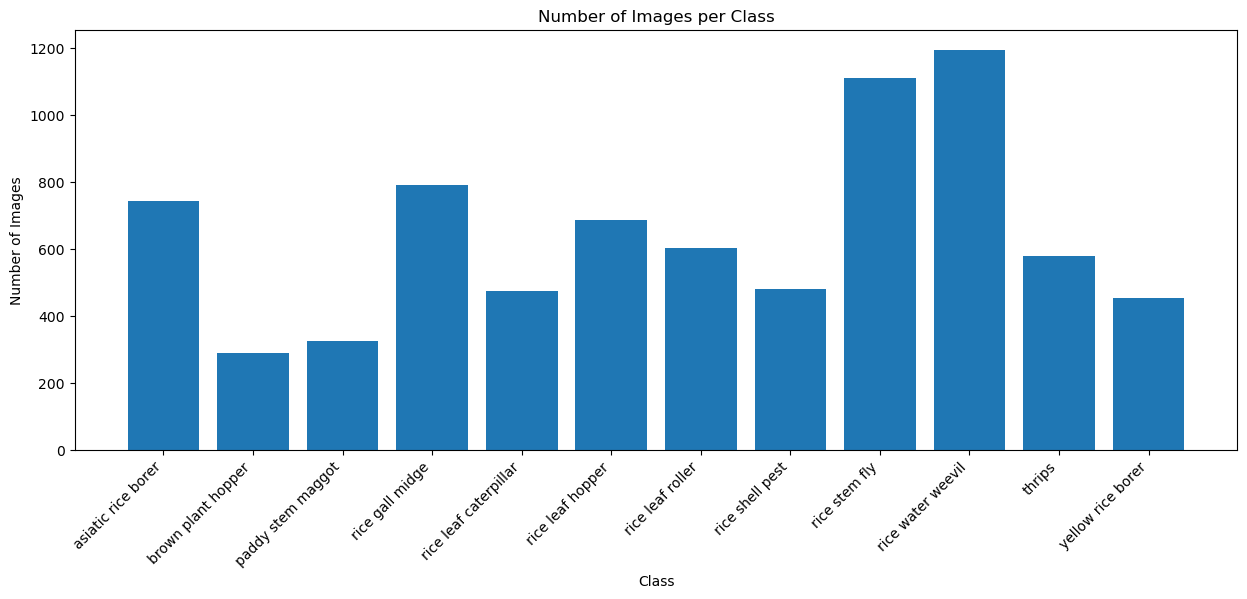

In [6]:
fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(211)
ax1.bar(image_counts.keys(), image_counts.values())
ax1.set_xlabel('Class')
ax1.set_ylabel('Number of Images')
ax1.set_title('Number of Images per Class')

ax1.set_xticks(range(len(image_counts))) 
ax1.set_xticklabels(image_counts.keys(), rotation=45, ha='right');


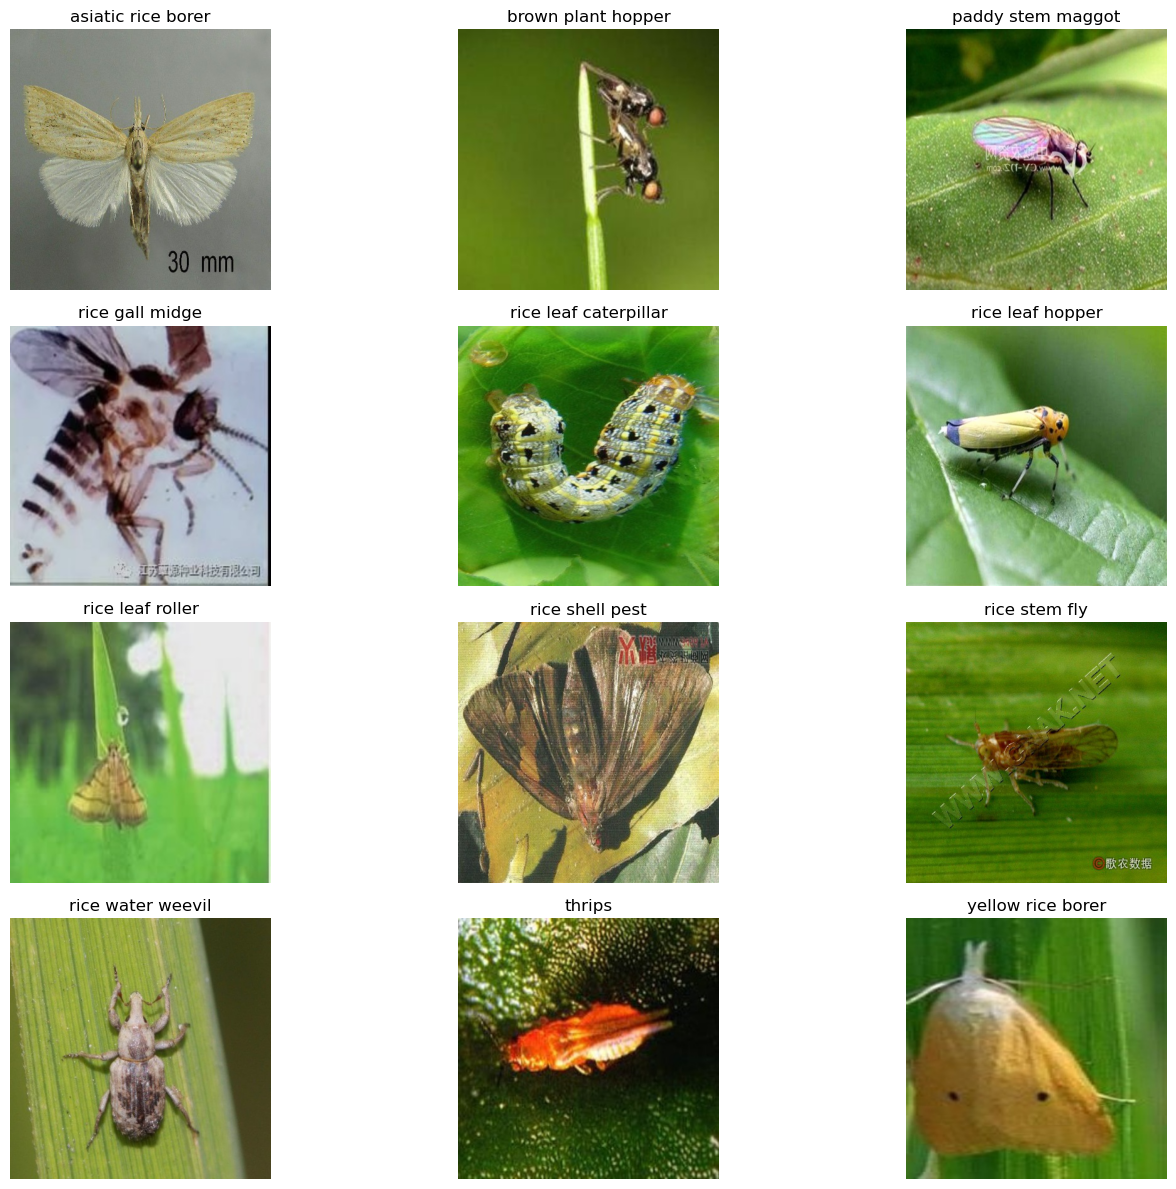

In [4]:
fig = plt.figure(figsize=(15, 12))

n_cols = 3
n_rows = (len(classes) + n_cols - 1) // n_cols

for i, class_name in enumerate(classes):
    img = mpimg.imread(random_images[class_name])
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(class_name)

plt.tight_layout()
plt.show()

***Code***

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset


In [4]:
# Define image transformations for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),             # Resize images to 224x224 (for pre-trained models)
    transforms.RandomHorizontalFlip(),         # Randomly flip images horizontally for augmentation
    transforms.RandomRotation(20),             # Randomly rotate the images
    transforms.ToTensor(),                     # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the images using ImageNet stats
])

In [6]:
dataset_dir = 'Rice Pest Detection/'  # The directory containing all the class folders

# Load the entire dataset (we will split it later)
full_dataset = datasets.ImageFolder(root=dataset_dir, transform=transform)

# Split indices for training and validation (80% train, 20% validation)
train_indices, valid_indices = train_test_split(range(len(full_dataset)), test_size=0.2, random_state=42)

# Create subsets for training and validation
train_subset = Subset(full_dataset, train_indices)
valid_subset = Subset(full_dataset, valid_indices)

# Create DataLoader for training and validation
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_subset, batch_size=32, shuffle=False, num_workers=4)

In [15]:
# Load a pre-trained ResNet18 model
model = models.resnet18(weights=True)

# Freeze the parameters in the pre-trained model (optional)
for param in model.parameters():
    param.requires_grad = False

# Modify the final layer for our specific number of classes
model.fc = nn.Linear(model.fc.in_features, 12)  # 12 classes in your case


d:\Anaconda\envs\torch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # Adam optimizer for the fully connected layer

In [18]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        # Move data to GPU
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

Epoch [1/10], Loss: 1.5928169111001123
Epoch [2/10], Loss: 0.9931759182939824
Epoch [3/10], Loss: 0.8296165672159687
Epoch [4/10], Loss: 0.7655633926084361
Epoch [5/10], Loss: 0.7000662335722717
Epoch [6/10], Loss: 0.6611068018318451
Epoch [7/10], Loss: 0.62164700369245
Epoch [8/10], Loss: 0.6032105769539616
Epoch [9/10], Loss: 0.59020211440079
Epoch [10/10], Loss: 0.5866471670337559


In [20]:
# Validation loop
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No need to compute gradients during validation
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy}%")


Validation Accuracy: 79.97416020671835%


***Second***

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import torchvision
import torchvision.models as models



In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


print(device)

cuda:0


In [21]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


dataset_dir = 'Rice Pest Detection/'  # The directory containing all the class folders

# Load the entire dataset (we will split it later)
full_dataset = datasets.ImageFolder(root=dataset_dir, transform=transform)

# Split indices for training and validation (80% train, 20% validation)
train_indices, valid_indices = train_test_split(range(len(full_dataset)), test_size=0.2, random_state=42)

# Create subsets for training and validation
train_subset = Subset(full_dataset, train_indices)
test_subset = Subset(full_dataset, valid_indices)

# Create DataLoader for training and validation
train_loader = DataLoader(train_subset, batch_size=4, shuffle=True, num_workers=4)
test_loader = DataLoader(test_subset, batch_size=4, shuffle=False, num_workers=4)

classes = train_loader.dataset.dataset.classes
classes


['asiatic rice borer',
 'brown plant hopper',
 'paddy stem maggot',
 'rice gall midge',
 'rice leaf caterpillar',
 'rice leaf hopper',
 'rice leaf roller',
 'rice shell pest',
 'rice stem fly',
 'rice water weevil',
 'thrips',
 'yellow rice borer']

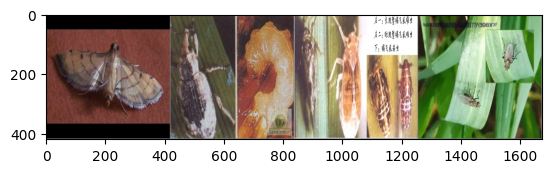

rice leaf roller-rice water weevil-rice stem fly-paddy stem maggot


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('-'.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [25]:
model = models.resnet50(weights=True)

num_classes = len(classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\LENOVO/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:15<00:00, 6.78MB/s]


In [26]:
for param in model.parameters():
    param.requires_grad = False

# Unfreeze only the final layer
for param in model.fc.parameters():
    param.requires_grad = True

In [28]:
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

In [29]:
for epoch in range(5):
    running_loss = 0.0
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/5] Loss: {running_loss/len(train_loader):.4f}')

print('Finished Training')

Epoch [1/5] Loss: 1.7355
Epoch [2/5] Loss: 1.2357
Epoch [3/5] Loss: 1.1148
Epoch [4/5] Loss: 1.0311
Epoch [5/5] Loss: 1.0034
Finished Training


In [30]:
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 80.75%


In [31]:
torch.save(model.state_dict(), 'rice_pest_model_state_dict.pth')

In [33]:
import torchvision.models as models
import torch.nn as nn

# Recreate your model structure
model = models.resnet50(pretrained=False)
num_classes = len(classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Load the trained weights
model.load_state_dict(torch.load('rice_pest_model_state_dict.pth'))

<All keys matched successfully>